# Hypothesis Test

In [1]:
from scipy import stats as stat
from matplotlib import pyplot as plt
import numpy as np
import random as rnd
import seaborn as sns
import os
import math

%matplotlib inline

In [5]:
def PlotXYnCI(mean, sigma, alpha=0.05, n=30, k=4):
    x = np.linspace(mean-k*sigma, mean+k*sigma, 1000)
    y = []
    cil, cih = 0., 0.
    if (n<30):
        y = stat.t.pdf(x,n-1,mean,sigma)
        t = abs(stat.t.ppf(alpha/2, n-1))
        cil = mean-t*sigma
        cih = mean+t*sigma
    else:
        y = stat.norm.pdf(x, mean, sigma)
        z = abs(stat.norm.ppf(alpha/2))
        cil = mean-z*sigma
        cih = mean+z*sigma
    return x, y, cil, cih

def TestOfHypothesisForOneSampleMean(H0_mean, sigma, mean, n):
    pval = 0.
    test_type = ''
    res = (mean-H0_mean)/(sigma)
    if (n<30):
        pval = stat.t.cdf(mean, n-1, H0_mean, sigma)
    else:
        pval = stat.norm.cdf(mean, H0_mean, sigma)
    if (H0_mean < mean):
        pval = 1-pval;
        
    if (n<30):
        test_type = 't'
    else:
        test_type ='Z'
        
    return test_type, res, pval

def TestOfHypothesisForTwoSampleMean(x1mean,x2mean, sigma, n):
    pval = 0.
    
    res = (x1mean-x2mean)/(sigma)
    if (n<30):
        pval = stat.t.cdf(mean, n-1, H0_mean, sigma)
    else:
        pval = stat.norm.cdf(mean, H0_mean, sigma)
    if (H0_mean < mean):
        pval = 1-pval;
        
    return res, pval

## Test of 1 Sample Z or t

H0 mean:60.000, stdev:10.000, sigma_xbar:2.236
alpha:0.01
Confidence Interval CIL:53.603, CIH:66.397
X mean:62.332, n:20 
t:1.043, p-value:0.155


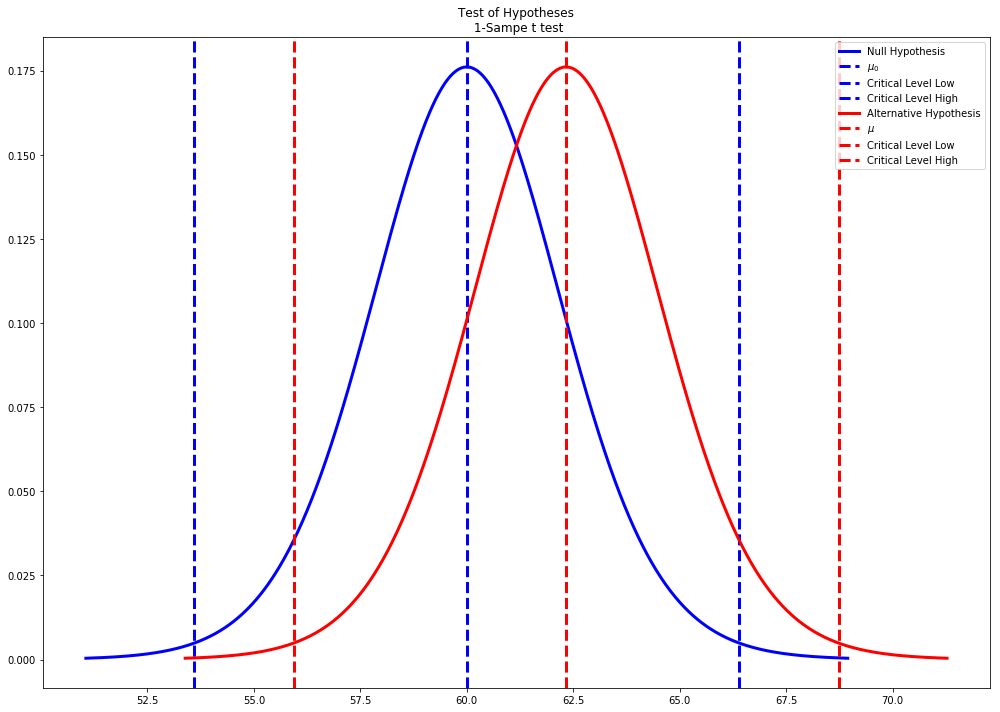

In [20]:


# population parameters
mu = 60
sigma = 10
# sample
n = 20
r = stat.norm.rvs(mu,sigma,n) # generate random values
xbar = np.mean(r)

# critical level
alpha = 0.01

# sampling distribution
x, y, cil, cih = PlotXYnCI(mu,sigma/math.sqrt(n), alpha = alpha, n=n)
x_sample, y_sample, cil_sample, cih_sample = PlotXYnCI(xbar,sigma/math.sqrt(n), alpha = alpha, n=n)
test_type, res, pval = TestOfHypothesisForOneSampleMean(mu, sigma/math.sqrt(n), xbar, n)


# Draw Plot
plt.figure(figsize=(14,10))
plt.plot(x, y, 'b-', linewidth=3, label="Null Hypothesis")
plt.axvline(x=mu, color='b', linewidth=3, linestyle='--', label = "$\mu_{0}$")
plt.axvline(x=cil, color='b', linewidth=3, linestyle='--', label = "Critical Level Low")
plt.axvline(x=cih, color='b', linewidth=3, linestyle='--', label = "Critical Level High")
plt.plot(x_sample, y_sample, 'r-', linewidth=3, label="Alternative Hypothesis")
plt.axvline(x=xbar, color='r', linewidth=3, linestyle='--', label = "$\mu$")
plt.axvline(x=cil_sample, color='r', linewidth=3, linestyle='--', label = "Critical Level Low")
plt.axvline(x=cih_sample, color='r', linewidth=3, linestyle='--', label = "Critical Level High")
plt.legend()
plt.title('Test of Hypotheses\n 1-Sampe {} test'.format(test_type))
plt.tight_layout()
# Print out statistic
print("H0 mean:{0:.3f}, stdev:{1:.3f}, sigma_xbar:{2:.3f}".format(mu, sigma, sigma/math.sqrt(n)))
print("alpha:{0}".format(alpha))
print("Confidence Interval CIL:{0:.3f}, CIH:{1:.3f}".format(cil,cih))
print("X mean:{0:.3f}, n:{1} ".format(xbar, n))
print("{0}:{1:.3f}, p-value:{2:.3f}".format(test_type, res, pval))
plt.show()

## 2 Sample t test

H0 mean:60.000, stdev:10.000, sigma_xbar:1.414
alpha:0.005
Confidence Interval CIL:56.357, CIH:63.643
H1 mean:63.000, n:50 
Z:2.121, p-value:0.017


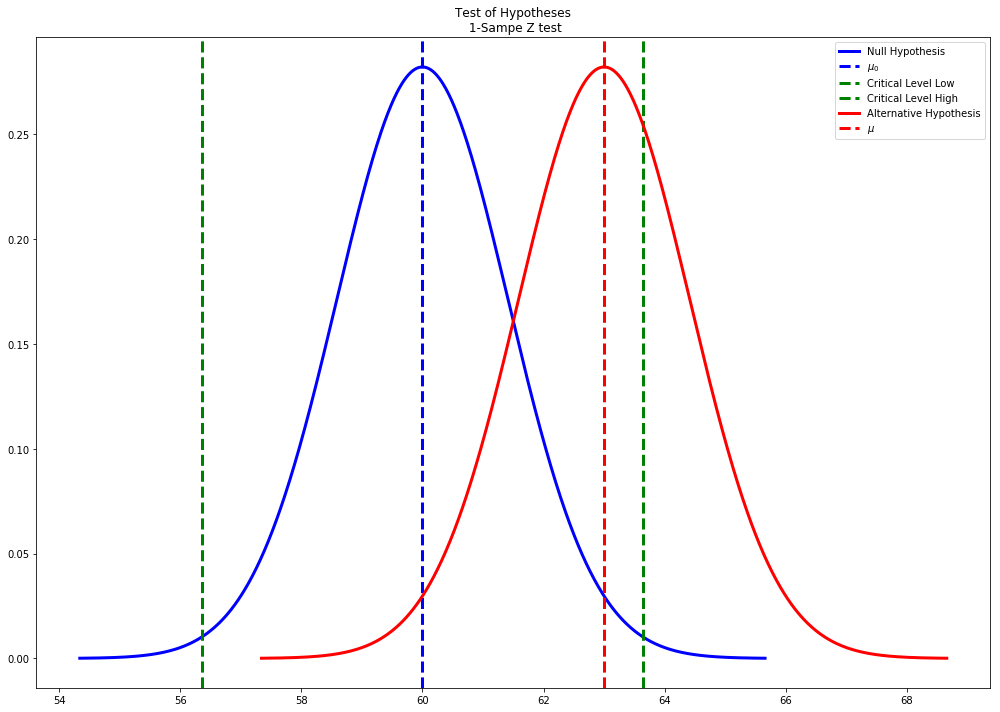

In [3]:
def PlotXYnCI(mean, sigma, alpha=0.05, n=30, k=4):
    x = np.linspace(mean-k*sigma, mean+k*sigma, 1000)
    y = []
    cil, cih = 0., 0.
    if (n<30):
        y = stat.t.pdf(x,n-1,mean,sigma)
        t = abs(stat.t.ppf(alpha/2, n-1))
        cil = mean-t*sigma
        cih = mean+t*sigma
    else:
        y = stat.norm.pdf(x, mean, sigma)
        z = abs(stat.norm.ppf(alpha/2))
        cil = mean-z*sigma
        cih = mean+z*sigma
    return x, y, cil, cih

def TestOfHypothesis(H0_mean, sigma, mean, n):
    pval = 0.
    res = (mean-H0_mean)/(sigma)
    if (n<30):
        pval = stat.t.cdf(mean, n-1, H0_mean, sigma)
    else:
        pval = stat.norm.cdf(mean, H0_mean, sigma)
    if (H0_mean < mean):
        pval = 1-pval
    return res, pval

# population parameters
H0_mean = 60
sigma = 10
# sample
n = 50
r = stat.norm.rvs(H0_mean,sigma,n) # generate random values
H1_mean = 63 #np.mean(r)

# critical level
alpha = 0.01

# sampling distribution
x, y, cil, cih = PlotXYnCI(H0_mean,sigma/math.sqrt(n), alpha = alpha, n=n)
x_sample, y_sample, cil_sample, cih_sample = PlotXYnCI(H1_mean,sigma/math.sqrt(n), alpha = alpha, n=n)
res, pval = TestOfHypothesis(H0_mean, sigma/math.sqrt(n), H1_mean, n)

if (n<30):
    test_type = 't'
else:
    test_type ='Z'
    
# Draw Plot
plt.figure(figsize=(14,10))
plt.plot(x, y, 'b-', linewidth=3, label="Null Hypothesis")
plt.axvline(x=H0_mean, color='b', linewidth=3, linestyle='--', label = "$\mu_{0}$")
plt.axvline(x=cil, color='g', linewidth=3, linestyle='--', label = "Critical Level Low")
plt.axvline(x=cih, color='g', linewidth=3, linestyle='--', label = "Critical Level High")
plt.plot(x_sample, y_sample, 'r-', linewidth=3, label="Alternative Hypothesis")
plt.axvline(x=H1_mean, color='r', linewidth=3, linestyle='--', label = "$\mu$")
plt.legend()
plt.title('Test of Hypotheses\n 2-Sampe {} test'.format(test_type))
plt.tight_layout()
# Print out statistic
print("H0 mean:{0:.3f}, stdev:{1:.3f}, sigma_xbar:{2:.3f}".format(H0_mean, sigma, sigma/math.sqrt(n)))
print("alpha:{0}".format(alpha/2))
print("Confidence Interval CIL:{0:.3f}, CIH:{1:.3f}".format(cil,cih))
print("H1 mean:{0:.3f}, n:{1} ".format(H1_mean, n))
print("{0}:{1:.3f}, p-value:{2:.3f}".format(test_type, res, pval))
plt.show()

## 1 Variance

## 2 Variance